# ROHAN KUMAR

# The Sparks Foundation Internship for Data Science
### Data Science & Business Analytics Tasks

## Prediction using Supervised ML (Level - Beginner)
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables(one independent and one dependent).

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# train and test split
from sklearn.model_selection import train_test_split

# some models from Scikit library
from sklearn.linear_model import LinearRegression

# some of the metrics for model's evaluation
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Importing Dataset

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# checking for null values
data.isna().any()

Hours     False
Scores    False
dtype: bool

In [6]:
# some basic statistics on data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


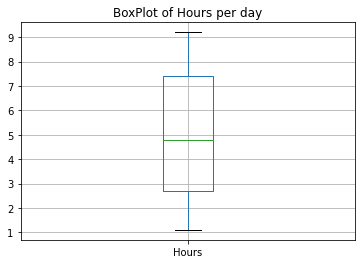

In [7]:
# checking outliers in feature column
data.boxplot('Hours')
plt.title('BoxPlot of Hours per day')
plt.show()

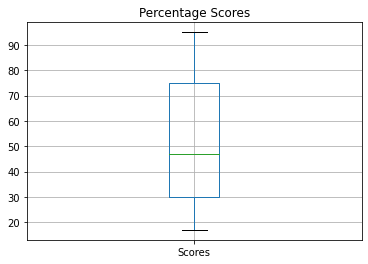

In [8]:
# checking for outliers in target column
data.boxplot('Scores')
plt.title('Percentage Scores')
plt.show()

**Clearly, there are no outliers in both columns and no missing values.**

## Observing relation between both columns

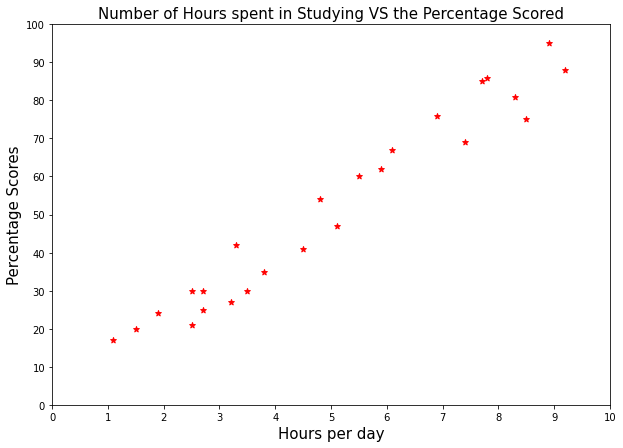

In [9]:
# plotting a scatter plot to get a clear picture
plt.figure(figsize=(10,7))
plt.scatter(x = "Hours", y = "Scores", data = data, marker="*", c='red')
plt.xlabel("Hours per day", size=15)
plt.ylabel("Percentage Scores", size=15)
plt.title("Number of Hours spent in Studying VS the Percentage Scored", size=15)
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(0,110,10))
plt.show()

***Clearly, there is almost a positive linear relationship between the number of Hours spend per day in studying and percentage of the students.***

### Classifying Target and Feature column from the data

In [10]:
# target = y and features = X

y = data["Scores"]
X = data.drop(columns = "Scores")

In [11]:
# splitting of target and features for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=35)

# Training the model

In [12]:
# intializing the model instance
np.random.seed(35)
reg = LinearRegression()

In [13]:
# fitting model with training set
reg.fit(X_train, y_train)

print("Training Complete.")

Training Complete.


In [14]:
print(f'This model accuracy on training set is {reg.score(X_train, y_train)*100:0.2f}%.')

This model accuracy on training set is 96.31%.


### Plotting regression line

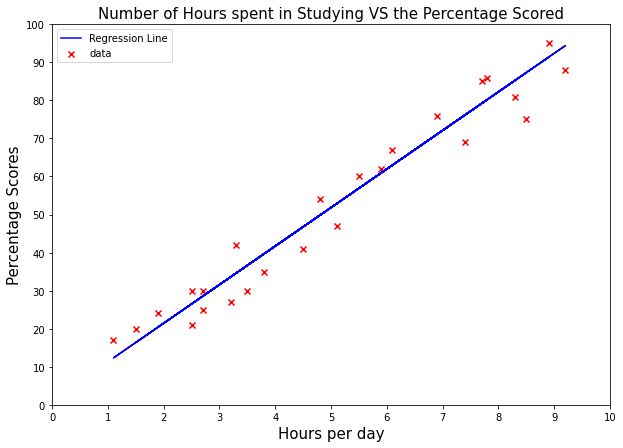

In [15]:
# regression line equation
reg_line = reg.coef_[0]*data["Hours"] + reg.intercept_

# plotting regression line along with scatter plot
plt.figure(figsize=(10,7))
plt.plot(data["Hours"], reg_line, "b", label="Regression Line")
plt.scatter(x = "Hours", y = "Scores", data = data, marker="x", c='red', label = "data")
plt.xlabel("Hours per day", size=15)
plt.ylabel("Percentage Scores", size=15)
plt.title("Number of Hours spent in Studying VS the Percentage Scored", size=15)
plt.xlim(0,10)
plt.ylim(0,100)
plt.xticks(np.arange(0,11,1))
plt.yticks(np.arange(0,110,10))
plt.legend()
plt.show()

## Making Predictions
Firstly, let's check the model prediction on the testing dataset and see by how much the predicted value differ from the original value.

In [16]:
# prediction on testing dataset
y_preds = reg.predict(X_test)

In [17]:
# creating a dataframe report for testing dataset
report = pd.DataFrame({'Actual Score' : y_test, 'Predicted Score' : y_preds})

# percentage difference between actual and predicted value
report['Absolute Difference'] = np.absolute(report['Actual Score']-report['Predicted Score'])
report

,Actual Score,Predicted Score,Absolute Difference
13,42,34.615536,7.384464
6,88,94.409942,6.409942
10,85,79.207975,5.792025
3,75,87.315691,12.315691
2,27,33.602072,6.602072


In [18]:
print(f'This model accuracy on testing data is {reg.score(X_test, y_test)*100:0.2f}%.')

This model accuracy on testing data is 89.15%.


# Predicting the required result
What will be predicted score if a student studies for 9.25 hrs/day?

In [19]:
# reshaping the input value and predicting its value
prediction = reg.predict(np.array(9.25).reshape((-1, 1)))

In [20]:
print(f'The prediction vlaue of percentage after studying for 9.25 hours a day is {prediction[0]:0.2f}%.')

The prediction vlaue of percentage after studying for 9.25 hours a day is 94.92%.


# Evaluating the model's correctness
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the  maximum error, mean absolute error and  mean square error.

In [21]:
print(f'Maximum Error : {max_error(y_test,y_preds):0.2f}.')
print(f'Mean Absolute Error : {mean_absolute_error(y_test,y_preds):0.2f}')
print(f'Mean Squarred Error : {mean_squared_error(y_test,y_preds):0.2f}')

Maximum Error : 12.32.
Mean Absolute Error : 7.70
Mean Squarred Error : 64.89


# Thank You